In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as pl

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/car brand classification/Datasets/Train'
valid_path = '/content/drive/MyDrive/car brand classification/Datasets/Test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/car brand classification/Datasets/Train/*')

In [ ]:
folders

['/content/drive/MyDrive/car brand classification/Datasets/Train/lamborghini',
 '/content/drive/MyDrive/car brand classification/Datasets/Train/mercedes',
 '/content/drive/MyDrive/car brand classification/Datasets/Train/audi']

In [ ]:

x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/car brand classification/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [ ]:

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/car brand classification/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=60,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/60
2/2 [==============================] - 71s 43s/step - loss: 3.8961 - accuracy: 0.4531 - val_loss: 6.7417 - val_accuracy: 0.3276
Epoch 2/60
2/2 [==============================] - 19s 14s/step - loss: 10.0880 - accuracy: 0.3438 - val_loss: 3.5423 - val_accuracy: 0.5172
Epoch 3/60
2/2 [==============================] - 19s 14s/step - loss: 5.2804 - accuracy: 0.3281 - val_loss: 3.8816 - val_accuracy: 0.2414
Epoch 4/60
2/2 [==============================] - 19s 14s/step - loss: 4.2553 - accuracy: 0.4219 - val_loss: 8.0575 - val_accuracy: 0.1552
Epoch 5/60
2/2 [==============================] - 19s 14s/step - loss: 4.2472 - accuracy: 0.3594 - val_loss: 2.1970 - val_accuracy: 0.3276
Epoch 6/60
2/2 [==============================] - 20s 14s/step - loss: 2.3428 - accuracy: 0.4688 - val_loss: 2.9933 - val_accuracy: 0.5690
Epoch 7/60
2/2 [==============================] - 19s 14s/step - loss: 4.1167 - accuracy: 0.4688 - val_loss: 2.1648 - val_accuracy: 0.5690
Epoch 8/60
2/2 [==========

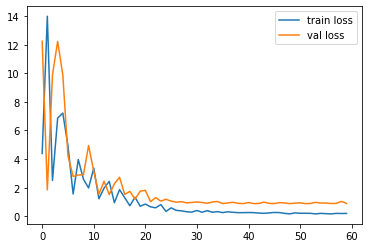

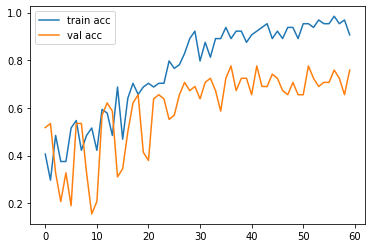

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred


array([[5.28637087e-03, 7.29228780e-02, 9.21790719e-01],
       [1.34502922e-03, 9.96012568e-01, 2.64246692e-03],
       [5.56639023e-02, 7.40038216e-01, 2.04297885e-01],
       [2.74194167e-06, 3.35763488e-03, 9.96639609e-01],
       [6.43640244e-03, 9.80554819e-01, 1.30087873e-02],
       [5.96532598e-02, 2.22708210e-02, 9.18075860e-01],
       [8.64006486e-03, 8.60316038e-01, 1.31043926e-01],
       [1.07007800e-02, 8.66103470e-01, 1.23195775e-01],
       [2.59786937e-02, 7.88064659e-01, 1.85956582e-01],
       [1.43153727e-01, 3.18340771e-02, 8.25012207e-01],
       [6.12901337e-02, 2.02600583e-01, 7.36109316e-01],
       [5.65727763e-02, 7.39035138e-04, 9.42688167e-01],
       [2.48808153e-02, 6.28931701e-01, 3.46187532e-01],
       [3.09279859e-02, 4.86136049e-01, 4.82936054e-01],
       [5.19135152e-04, 9.89364982e-01, 1.01158172e-02],
       [2.99805790e-01, 6.30437136e-01, 6.97571114e-02],
       [9.23262089e-02, 6.11613154e-01, 2.96060711e-01],
       [8.36038113e-01, 1.57588

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 2, 1, 0, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 0, 2, 0, 0, 1, 2, 1, 2])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/car brand classification/Datasets/Test/lamborghini/16.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[ 22.,  24.,  23.],
        [ 12.,  14.,  11.],
        [  8.,  10.,   7.],
        ...,
        [218., 226., 239.],
        [209., 217., 230.],
        [ 92.,  98., 112.]],

       [[ 17.,  19.,  16.],
        [ 11.,  13.,  10.],
        [  9.,  11.,   8.],
        ...,
        [215., 223., 236.],
        [214., 222., 235.],
        [ 74.,  80.,  94.]],

       [[ 17.,  19.,  16.],
        [ 11.,  13.,  10.],
        [  9.,  11.,   8.],
        ...,
        [215., 223., 236.],
        [214., 222., 235.],
        [ 74.,  80.,  94.]],

       ...,

       [[128., 121., 115.],
        [120., 113., 107.],
        [129., 122., 116.],
        ...,
        [125., 120., 117.],
        [115., 110., 107.],
        [102.,  97.,  94.]],

       [[128., 121., 115.],
        [120., 113., 107.],
        [129., 122., 116.],
        ...,
        [125., 120., 117.],
        [115., 110., 107.],
        [102.,  97.,  94.]],

       [[116., 109., 103.],
        [129., 122., 116.],
        [108., 1

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.00249595, 0.0448624 , 0.95264167]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

array([False])